C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Characteristics:
         Feature 1  Feature 2
Cluster                      
0         1.508360   2.704501
1         9.302869  -2.238027
2        -1.520829   5.103949

Cluster Distribution:
Cluster
2    204
0    196
1    100
Name: count, dtype: int64


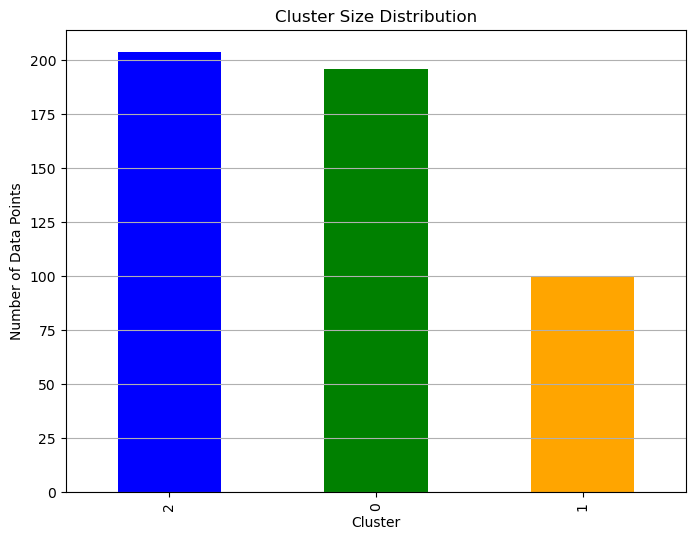

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:\\Users\\vatch\\Downloads\\archive (5)\\cluster_data.csv")

# Selecting numerical features for clustering (excluding labels or identifiers, if any)
X = data.iloc[:, :-1].values  

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with the optimal K (assumed from the Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').mean()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_summary)

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()
print("\nCluster Distribution:")
print(cluster_counts)

# Visualize the cluster distributions
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.grid(axis='y')
plt.show()
